# Hamza Luqman - ENSF 611 Project

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset

In [2]:

dataset_train = pd.read_csv("train.csv")
dataset_test = pd.read_csv("test.csv")

In [3]:
print("The shape of the loaded dataset_train is: ", dataset_train.shape)

The shape of the loaded dataset_train is:  (891, 12)


In [4]:
print("The shape of the loaded dataset_test is: ", dataset_test.shape)

The shape of the loaded dataset_test is:  (418, 11)


# Getting data information for train and test set

In [5]:
dataset_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
dataset_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
dataset_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


# It looks like we have missing values for some coulumns. Let's print the names of these columns 

In [9]:
# checking for missing data
incomplete_features_train = [feature for feature in dataset_train if dataset_train[feature].isnull().sum()>0]
print("Features with missing data in dataset_train : ",incomplete_features_train)
print("\n")

incomplete_features_test = [feature for feature in dataset_test if dataset_test[feature].isnull().sum()>0]
print("Features with missing data in dataset_test: ",incomplete_features_test)


Features with missing data in dataset_train :  ['Age', 'Cabin', 'Embarked']


Features with missing data in dataset_test:  ['Age', 'Fare', 'Cabin']


In [10]:
# getting % of missing values from each of the incomplete_features
print("Training data:")
for feature in incomplete_features_train:
    print("{} has {:.2f}% missing values".format(feature, (dataset_train[feature].isnull().mean() * 100)))
print("\n")
print("Test data")
for feature in incomplete_features_test:
    print("{} has {:.2f}% missing values".format(feature, (dataset_test[feature].isnull().mean() * 100)))

Training data:
Age has 19.87% missing values
Cabin has 77.10% missing values
Embarked has 0.22% missing values


Test data
Age has 20.57% missing values
Fare has 0.24% missing values
Cabin has 78.23% missing values


### There are over 77% missing values in Cabin feature matrix, so we will get rid of it.

### For the Embarked comlumn in the , we can impute the mode for the missing values

In [11]:


from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

categorical_impute = SimpleImputer(strategy = 'most_frequent')
numerical_impute = SimpleImputer(strategy = 'mean')
ordinal_enc = OrdinalEncoder()
ohe =  OneHotEncoder(sparse=False)

### Preprocessing on dataset_train and dataset_test

In [18]:
# imputing most frequent Embarked values into missing values
dataset_train['Embarked'] = categorical_impute.fit_transform(dataset_train['Embarked'].values.reshape(-1,1))

# Convertig the categorical Embarked column to numerical features.
dataset_train = pd.get_dummies(dataset_train, columns=["Embarked"])

# imputing mean Age values into missing values
dataset_train['Age'] = numerical_impute.fit_transform(dataset_train['Age'].values.reshape(-1,1))

# Ordinal Encoding Sex columns. Male will change to 1, Female to 0.
dataset_train['Sex'] = ordinal_enc.fit_transform(dataset_train['Sex'].values.reshape(-1,1))


In [19]:
# imputing mean Age values into missing values
dataset_test['Age'] = numerical_impute.fit_transform(dataset_test['Age'].values.reshape(-1,1))

# imputing mean Fare values into missing values
dataset_test['Fare'] = numerical_impute.fit_transform(dataset_test['Fare'].values.reshape(-1,1))

# Ordinal Encoding Sex columns. Male will change to 1, Female to 0.
dataset_test['Sex'] = ordinal_enc.fit_transform(dataset_test['Sex'].values.reshape(-1,1))


# Convertig the categorical Embarked column to numerical features.
dataset_test = pd.get_dummies(dataset_test, columns=["Embarked"])

### There are columns in this dataset that do not add value to our analysis.
### PassengerID, Name, Ticket are unique values and will not help us in our machine learning tasks so they will be droped. 
### Since Cabin has over 77% missing values in both training and test dataset, this column will be dropped.

In [20]:
# let's get rid of columns we don't need
dataset_train = dataset_train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

dataset_test = dataset_test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

In [21]:
dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    float64
 3   Age         891 non-null    float64
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   Fare        891 non-null    float64
 7   Embarked_C  891 non-null    uint8  
 8   Embarked_Q  891 non-null    uint8  
 9   Embarked_S  891 non-null    uint8  
dtypes: float64(3), int64(4), uint8(3)
memory usage: 51.5 KB


In [23]:
dataset_train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [159]:
dataset_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      418 non-null    int64  
 1   Sex         418 non-null    float64
 2   Age         418 non-null    float64
 3   SibSp       418 non-null    int64  
 4   Parch       418 non-null    int64  
 5   Fare        418 non-null    float64
 6   Embarked_C  418 non-null    uint8  
 7   Embarked_Q  418 non-null    uint8  
 8   Embarked_S  418 non-null    uint8  
dtypes: float64(3), int64(3), uint8(3)
memory usage: 20.9 KB


In [160]:
dataset_test.isnull().sum()

Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [161]:
dataset_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1.0,22.0,1,0,7.2500,0,0,1
1,1,1,0.0,38.0,1,0,71.2833,1,0,0
2,1,3,0.0,26.0,0,0,7.9250,0,0,1
3,1,1,0.0,35.0,1,0,53.1000,0,0,1
4,0,3,1.0,35.0,0,0,8.0500,0,0,1


In [162]:
dataset_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,1.0,34.5,0,0,7.8292,0,1,0
1,3,0.0,47.0,1,0,7.0000,0,0,1
2,2,1.0,62.0,0,0,9.6875,0,1,0
3,3,1.0,27.0,0,0,8.6625,0,0,1
4,3,0.0,22.0,1,1,12.2875,0,0,1


# Let's visualize the correlation between the columns in our dataset_train

In [28]:
correlation = dataset_train.corr()

<AxesSubplot:>

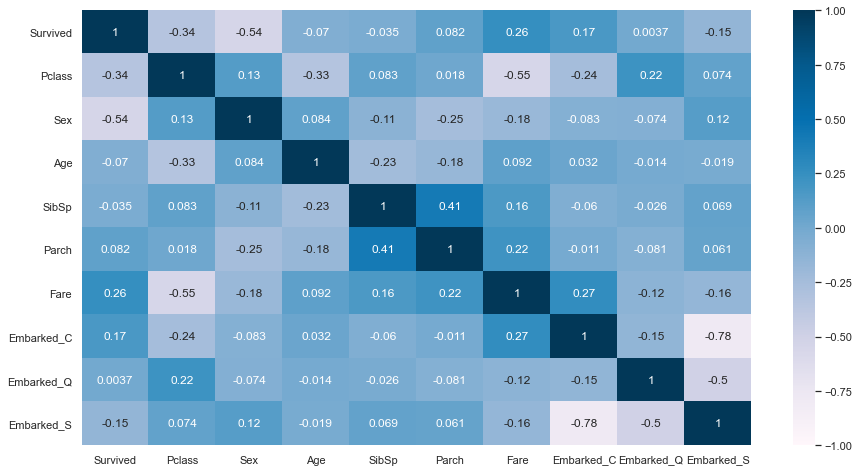

In [29]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(correlation, vmin=-1, vmax=1, annot=True, cmap='PuBu')  #PuBu

Something interesting to note here is that as the passenger class (Pclass) increases, the survival number goes down. 

This might be due to the fact that the first class passengers had access to more lifeboats.

## Creating feature matrix and target vector

In [142]:
# preparing feature matrix and target vector

In [75]:
# Dropping the Survived column from the dataset and loading the remainder
# to feature matrix X

X = dataset_train.drop('Survived', 1)

In [76]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,1.0,22.0,1,0,7.2500,0,0,1
1,1,0.0,38.0,1,0,71.2833,1,0,0
2,3,0.0,26.0,0,0,7.9250,0,0,1
3,1,0.0,35.0,1,0,53.1000,0,0,1
4,3,1.0,35.0,0,0,8.0500,0,0,1


In [77]:
print("The shape of fetaure matrix X is: ", X.shape)

The shape of fetaure matrix X is:  (891, 9)


In [78]:
# Creating a target vector y that has the Survived column form 
# original dataset

y = dataset_train['Survived']

In [79]:
y.head()
print("Target vector shape is: ", y.shape)

Target vector shape is:  (891,)


C:\Users\Hamza\anaconda3\envs\ensf-ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


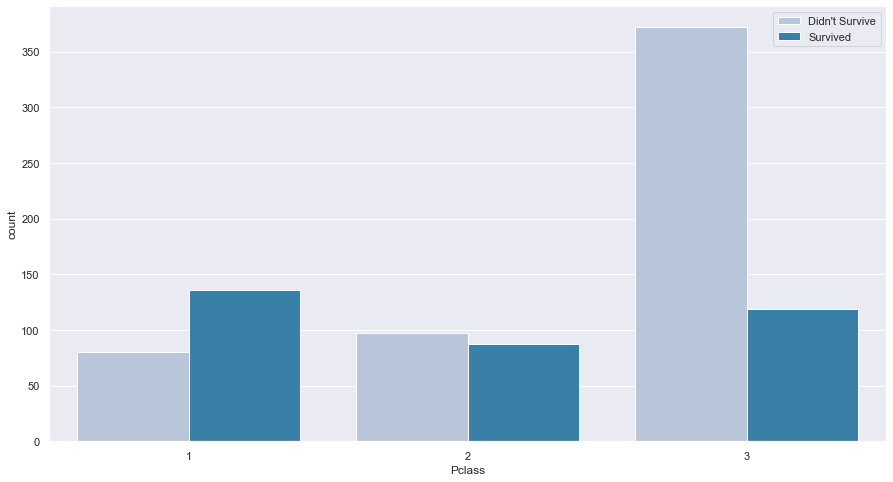

In [80]:
ax = sns.countplot(X['Pclass'], hue = y, palette = "PuBu")

category = ["Didn't Survive", "Survived"]
ax.legend(category)

### From the above plot, we can see that as the Pclass increases (class becomes lower) the ratio of survivers to those who did not survive decreases

In [81]:
from sklearn.model_selection import cross_validate


def get_classifier_cv_score(model, X, y, cv, scoring='average_precision'):
    '''Calculate train and validation scores of classifier (model) using cross-validation
        
        
        model (sklearn classifier): Classifier to train and evaluate
        X (numpy.array or pandas.DataFrame): Feature matrix
        y (numpy.array or pandas.Series): Target vector
        scoring (str): a scoring string accepted by sklearn.metrics.cross_validate()
        cv (int): number of cross-validation folds see sklearn.metrics.cross_validate()
        
        returns: mean training score, mean validation score
    
    '''
    
     #TODO: implement function body
    scores = cross_validate(model, X, y, cv=cv, return_train_score=True, scoring= scoring)
    
    return scores['train_score'].mean(), scores['test_score'].mean()

In [82]:
import mglearn

def plot_grid_search_results(grid_search):
    '''For grids with 2 hyperparameters, create a heatmap plot of test scores
        
        grid_search (sklearn GridSearchCV): Fitted GridSearchCV object
        
        uses mglearn.tools.heatmap() for plotting.
    
    '''
    results = pd.DataFrame(grid_search.cv_results_)

    params = sorted(grid_search.param_grid.keys())
    
    assert len(params) == 2, "We can only plot two parameters."
    
    # second dimension in reshape are rows, needs to be the fast changing parameter
    scores = np.array(results.mean_test_score).reshape(len(grid_search.param_grid[params[0]]),
                                                      len(grid_search.param_grid[params[1]]))

    # plot the mean cross-validation scores
    # x-axis needs to be the fast changing parameter
    mglearn.tools.heatmap(scores, 
                          xlabel=params[1], 
                          xticklabels=grid_search.param_grid[params[1]], 
                          ylabel=params[0], 
                          yticklabels=grid_search.param_grid[params[0]],
                          cmap="viridis", fmt="%0.3f")

# ML Models

In [102]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix 

In [84]:
# Splitting the dataset_train feature matrix and target vector

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=37)

### We will be using: 
- LogisticRegression 
- RandomForrestClassifier 
- GradientBoostingClassifier
- SVC 

to test out trainig data. The better performing models will then be selected and tuned for hyper parameters to identify the best parameters that will give us a good accuracy score.

In [85]:
model_list = [LogisticRegression(max_iter=1000), RandomForestClassifier(random_state=55), 
              GradientBoostingClassifier(random_state=56), SVC()]

results = {}
for model in model_list:
    
    training, validation = get_classifier_cv_score(model, X_train, y_train, cv=7, scoring='average_precision')
    results.update({model:(training, validation)})

In [86]:
i = 0
for key, value in results.items():
    print("Model: {}  Training score: {:.3f}  Validation score {:.3f} ".format(key, value[0], value[1]))
    i+=1

Model: LogisticRegression(max_iter=1000)  Training score: 0.819  Validation score 0.814 
Model: RandomForestClassifier(random_state=55)  Training score: 0.997  Validation score 0.808 
Model: GradientBoostingClassifier(random_state=56)  Training score: 0.941  Validation score 0.833 
Model: SVC()  Training score: 0.621  Validation score 0.623 


RandomForestClassifier and GradientBoostingClassifier seems to be good candidates for hyper parameter tuning

In [136]:
RFC_param_grid = {'max_depth': [3, 5, 7, 9],
                         'n_estimators': [ 1000, 1300, 1500, 2000, 2300]}

GBC_param_grid = {'learning_rate': [0.001, 0.01, 0.1, 1.0],
                         'n_estimators': [20, 50, 100, 200, 300]}



In [121]:
from sklearn.model_selection import GridSearchCV

In [122]:
grid_search_RFC = GridSearchCV(RandomForestClassifier(random_state=55), RFC_param_grid, cv=7,
                          return_train_score=True, n_jobs = 5)

In [123]:
grid_search_RFC.fit(X_train, y_train)

GridSearchCV(cv=7, estimator=RandomForestClassifier(random_state=55), n_jobs=5,
             param_grid={'max_depth': [3, 5, 7, 9],
                         'n_estimators': [1000, 1300, 1500, 2000, 2300]},
             return_train_score=True)

In [124]:
print("Best parameters: {}".format(grid_search_RFC.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_RFC.best_score_))

Best parameters: {'max_depth': 5, 'n_estimators': 2000}
Best cross-validation score: 0.84


In [125]:
#print("Test set score: {:.2f}".format(grid_search_RFC.score(X_test, y_test)))   # 0.93 with X_train in here

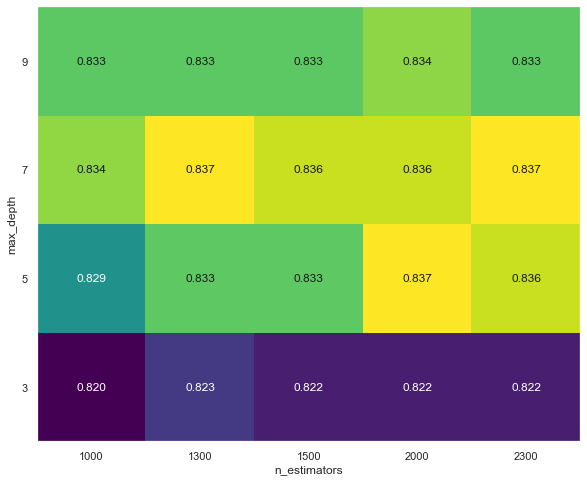

In [126]:
plot_grid_search_results(grid_search_RFC)

The best parameters for RandomForrestClassifier are:
- max_depth = 5
- n_estimators = 2000

In [137]:
grid_search_GBC = GridSearchCV(GradientBoostingClassifier(random_state=56), GBC_param_grid, cv=7,
                          return_train_score=True, n_jobs = 5)

In [138]:
grid_search_GBC.fit(X_train, y_train)

GridSearchCV(cv=7, estimator=GradientBoostingClassifier(random_state=56),
             n_jobs=5,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1.0],
                         'n_estimators': [20, 50, 100, 200, 300]},
             return_train_score=True)

In [139]:
#print("Test set score: {:.2f}".format(grid_search_GBC.score(X, y)))

In [140]:
print("Best parameters: {}".format(grid_search_GBC.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_GBC.best_score_))

Best parameters: {'learning_rate': 0.1, 'n_estimators': 50}
Best cross-validation score: 0.83


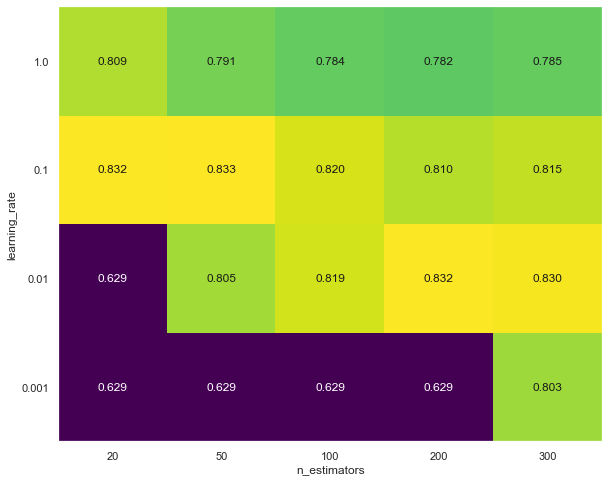

In [141]:
plot_grid_search_results(grid_search_GBC)

The best parameters for GradientBoostingClassifier are:
- learning_rate = 0.1
- n_estimators = 50

## Retraining best models for RandomForrestClassifier and GradientBoostingClassifier on training data

In [152]:
# RandomForestClassifier

model_RFC = RandomForestClassifier(random_state=55, max_depth = 5, n_estimators = 2000)
model_RFC.fit(X_train, y_train)

y_train_predict_RFC = model_RFC.predict(X_train)
y_test_predict_RFC = model_RFC.predict(X_test)



In [153]:
print(classification_report(y_test, y_test_predict_RFC))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83       101
           1       0.83      0.67      0.74        78

    accuracy                           0.79       179
   macro avg       0.80      0.78      0.78       179
weighted avg       0.80      0.79      0.79       179



Text(312.56, 0.5, 'true value')

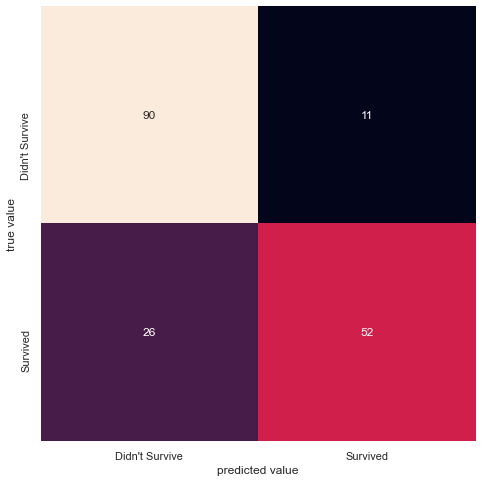

In [157]:
matrix = confusion_matrix(y_test, y_test_predict_RFC, labels = [0, 1])

sns.heatmap(matrix, xticklabels=["Didn't Survive", 'Survived'], yticklabels=["Didn't Survive", 'Survived'],
           square=True, annot=True, cbar=False, fmt="1.0f")

plt.xlabel('predicted value')
plt.ylabel('true value')

We have a precision of 0.83 and recall of 0.67

In [155]:
# GradientBoostingClassifier
model_GBC = GradientBoostingClassifier(random_state=56, learning_rate = 0.1, n_estimators = 50)
model_GBC.fit(X_train, y_train)

y_train_predict_GBC = model_GBC.predict(X_train)
y_test_predict_GBC = model_GBC.predict(X_test)

In [156]:
print(classification_report(y_test, y_test_predict_GBC))

              precision    recall  f1-score   support

           0       0.80      0.89      0.85       101
           1       0.84      0.72      0.77        78

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179



Text(312.56, 0.5, 'true value')

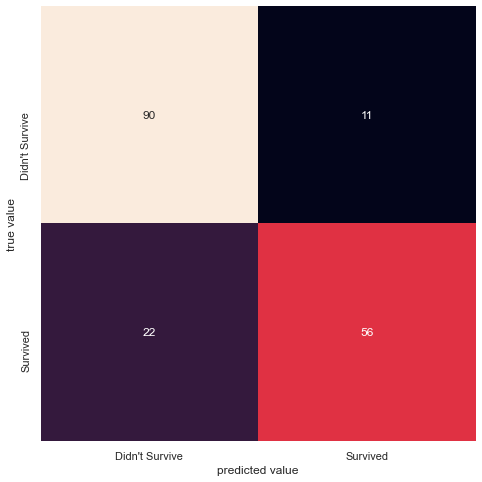

In [158]:
matrix = confusion_matrix(y_test, y_test_predict_GBC, labels = [0, 1])

sns.heatmap(matrix, xticklabels=["Didn't Survive", 'Survived'], yticklabels=["Didn't Survive", 'Survived'],
           square=True, annot=True, cbar=False, fmt="1.0f")

plt.xlabel('predicted value')
plt.ylabel('true value')

We have a precision of 0.84 and recall of 0.72

From the above results, GradientBoostingClassifier(random_state=56, learning_rate = 0.1, n_estimators = 50) will be best suited for making a prediction on our test dataset which does not have a column for 'Survived'

### Making prediction on dataset_test

In [163]:
dataset_test_predcit = model_GBC.predict(dataset_test)

In [167]:
dataset_test['Survived'] = dataset_test_predcit

In [170]:
dataset_test.head(20)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Survived
0,3,1.0,34.50000,0,0,7.8292,0,1,0,0
1,3,0.0,47.00000,1,0,7.0000,0,0,1,0
2,2,1.0,62.00000,0,0,9.6875,0,1,0,0
3,3,1.0,27.00000,0,0,8.6625,0,0,1,0
4,3,0.0,22.00000,1,1,12.2875,0,0,1,0
5,3,1.0,14.00000,0,0,9.2250,0,0,1,0
6,3,0.0,30.00000,0,0,7.6292,0,1,0,1
7,2,1.0,26.00000,1,1,29.0000,0,0,1,0
8,3,0.0,18.00000,0,0,7.2292,1,0,0,1
9,3,1.0,21.00000,2,0,24.1500,0,0,1,0


In [ ]:
# creating a csv file with the results of the predictions

In [173]:
dataset_test.to_csv("Predictions.csv", sep=',')

# End of notebook